In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
def get_data():
    # read csv and return it
    data = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/log/csv/reward_20210405-170520_2_PER.csv")
    return data

def average_data(data, n):
    # Average n data for smooth plotting
    data_copy = data.copy()
    avg_data = data.copy()
    #print(avg_data["Average Reward"][1])
    #print(data["Average Reward"][1:5])
    for i in range(data.shape[0]):
        if i >= n:
            avg_data["Average Reward"][i] = data_copy["Average Reward"][i-n+1:i+1].to_numpy().mean()
            
    return avg_data

def mean_std(*data):
    # 1. Calculate the minimum length of dataframes
    min_len = 1000000
    for d in data:
        min_len = min(min_len, len(d.index))
    
    #min_len = 334
    # 2. Calculate mean and standard deviation of reward values for each episode.
    mean = []
    std  = []
    for i in range(min_len):
        mean.append(np.mean([d["Average Reward"][i] for d in data]))
        std.append(np.std([d["Average Reward"][i] for d in data]))
        
    return np.array(mean), np.array(std), min_len

In [6]:
num_seed = 3
num_exp = 5
algo_name = "FLDDPG"
log_path = "~/catkin_ws/src/frl_swarm/src/log/" 
print(log_path + "reward_20210515-131734_6_HER.csv")


print(log_path)
data_mean = [[] for i in range(num_exp)]
data_std = [[] for i in range(num_exp)]
upper_data = [[] for i in range(num_exp)]
lower_data = [[] for i in range(num_exp)]

# Weight Averaging Frequency 1
IDDPG = [[] for i in range(num_seed)]
print("IDDPG data loading started")
#waf_1[0] = pd.read_csv("~/catkin_ws/src/frl_swarm/src/log/FLDDPG/csv/reward_20210515-131734_6_HER.csv")
IDDPG[0] = pd.read_csv(log_path + "IACDDPG/csv/" + "reward_20210516-215158_6_HER.csv",error_bad_lines=False)
IDDPG[1] = pd.read_csv(log_path + "IACDDPG/csv/" + "reward_20210528-130515_6_HER.csv",error_bad_lines=False)
IDDPG[2] = pd.read_csv(log_path + "IACDDPG/csv/" + "reward_20210529-001913_6_HER.csv",error_bad_lines=False)

IDDPG[0] = average_data(IDDPG[0], 5)
IDDPG[1] = average_data(IDDPG[1], 5)
IDDPG[2] = average_data(IDDPG[2], 5)
print("IDDPG data has been successfully processed")

data_mean[0], data_std[0], min_len = mean_std(IDDPG[0], IDDPG[1], IDDPG[2])
print("min_len: {}".format(min_len))

upper_data[0] = data_mean[0] + data_std[0]
lower_data[0] = data_mean[0] - data_std[0]

# Weight Averaging Frequency 2
SNDDPG = [[] for i in range(num_seed)]
print("SNDDPG data loading started")
SNDDPG[0] = pd.read_csv(log_path + "SNACDDPG/csv/" + "reward_20210528-234257_6_HER.csv",error_bad_lines=False)
SNDDPG[1] = pd.read_csv(log_path + "SNACDDPG/csv/" + "reward_20210515-131900_6_HER.csv",error_bad_lines=False)
SNDDPG[2] = pd.read_csv(log_path + "SNACDDPG/csv/" + "reward_20210515-030007_6_HER.csv",error_bad_lines=False)

SNDDPG[0] = average_data(SNDDPG[0], 5)
SNDDPG[1] = average_data(SNDDPG[1], 5)
SNDDPG[2] = average_data(SNDDPG[2], 5)
print("SNDDPG data has been successfully processed")

data_mean[1], data_std[1], min_len = mean_std(SNDDPG[0], SNDDPG[1], SNDDPG[2])
print("min_len: {}".format(min_len))
upper_data[1] = data_mean[1] + data_std[1]
lower_data[1] = data_mean[1] - data_std[1]

# SEDDPG
SEDDPG = [[] for i in range(num_seed)]
print("SEDDPG data loading started")
SEDDPG[0] = pd.read_csv(log_path + "SEACDDPG/csv/" + "reward_20210514-093213_6_HER.csv",error_bad_lines=False)
SEDDPG[1] = pd.read_csv(log_path + "SEACDDPG/csv/" + "reward_20210530-005137_6_HER.csv",error_bad_lines=False)
SEDDPG[2] = pd.read_csv(log_path + "SEACDDPG/csv/" + "reward_20210529-145836_6_HER.csv",error_bad_lines=False)

SEDDPG[0] = average_data(SEDDPG[0], 5)
SEDDPG[1] = average_data(SEDDPG[1], 5)
SEDDPG[2] = average_data(SEDDPG[2], 5)
print("SEDDPG data has been successfully processed")

data_mean[2], data_std[2], min_len = mean_std(SEDDPG[0], SEDDPG[1], SEDDPG[2])
print("min_len: {}".format(min_len))
upper_data[2] = data_mean[2] + data_std[2]
lower_data[2] = data_mean[2] - data_std[2]

# FLDDPG
FLDDPG = [[] for i in range(num_seed)]
print("FLDDPG data loading started")
FLDDPG[0] = pd.read_csv(log_path + "FLDDPG/csv/" + "reward_20210524-173426_6_HER.csv",error_bad_lines=False)
FLDDPG[1] = pd.read_csv(log_path + "FLDDPG/csv/" + "reward_20210525-044443_6_HER.csv",error_bad_lines=False)
FLDDPG[2] = pd.read_csv(log_path + "FLDDPG/csv/" + "reward_20210525-155924_6_HER.csv",error_bad_lines=False)

FLDDPG[0] = average_data(FLDDPG[0], 5)
FLDDPG[1] = average_data(FLDDPG[1], 5)
FLDDPG[2] = average_data(FLDDPG[2], 5)
print("FLDDPG data has been successfully processed")

data_mean[3], data_std[3], min_len = mean_std(FLDDPG[0], FLDDPG[1], FLDDPG[2])
print("min_len: {}".format(min_len))
upper_data[3] = data_mean[3] + data_std[3]
lower_data[3] = data_mean[3] - data_std[3]


# SWARMDDPG
SWARMDDPG = [[] for i in range(num_seed)]
print("SWARMDDPG data loading started")
SWARMDDPG[0] = pd.read_csv(log_path + "FLDDPG/csv/" + "reward_20210820-223502_6_HER.csv",error_bad_lines=False)
SWARMDDPG[1] = pd.read_csv(log_path + "FLDDPG/csv/" + "reward_20210821-094538_6_HER.csv",error_bad_lines=False)
SWARMDDPG[2] = pd.read_csv(log_path + "FLDDPG/csv/" + "reward_20210820-223502_6_HER.csv",error_bad_lines=False)

SWARMDDPG[0] = average_data(SWARMDDPG[0], 5)
SWARMDDPG[1] = average_data(SWARMDDPG[1], 5)
SWARMDDPG[2] = average_data(SWARMDDPG[2], 5)
print("SWARMDDPG data has been successfully processed")

data_mean[4], data_std[4], min_len = mean_std(SWARMDDPG[0], SWARMDDPG[1], SWARMDDPG[2])
print("min_len: {}".format(min_len))
upper_data[4] = data_mean[4] + data_std[4]
lower_data[4] = data_mean[4] - data_std[4]


# Episode length calculation
eps = []
for i in range(min_len):
    eps.append(FLDDPG[0]["Episode"][i])
    
print("Done")


~/catkin_ws/src/frl_swarm/src/log/reward_20210515-131734_6_HER.csv
~/catkin_ws/src/frl_swarm/src/log/
IDDPG data loading started


b'Skipping line 336: expected 2 fields, saw 6\n'
b'Skipping line 336: expected 2 fields, saw 6\n'
/home/sub/mpe_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


IDDPG data has been successfully processed
min_len: 334
SNDDPG data loading started


b'Skipping line 336: expected 2 fields, saw 6\n'
b'Skipping line 336: expected 2 fields, saw 6\n'


SNDDPG data has been successfully processed
min_len: 334
SEDDPG data loading started


b'Skipping line 336: expected 2 fields, saw 6\n'
b'Skipping line 336: expected 2 fields, saw 6\n'


SEDDPG data has been successfully processed
min_len: 334
FLDDPG data loading started


b'Skipping line 336: expected 2 fields, saw 6\n'
b'Skipping line 336: expected 2 fields, saw 6\n'
b'Skipping line 336: expected 2 fields, saw 6\n'


FLDDPG data has been successfully processed
min_len: 334
SWARMDDPG data loading started


b'Skipping line 336: expected 2 fields, saw 6\n'
b'Skipping line 336: expected 2 fields, saw 6\n'
b'Skipping line 336: expected 2 fields, saw 6\n'


SWARMDDPG data has been successfully processed
min_len: 334
Done


/home/sub/mpe_env/lib/python3.6/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


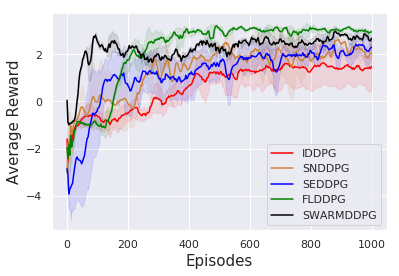

In [8]:
#avg_data = average_data(avg_data, 5)
#print(data)
#print(avg_data)
#waf_list=[1, 2, 3, 5, 10, 20, 30]
#color_list = ["teal", "orangered", "green", "darkorange", "purple"]
#fbtw_list = ["powderblue", "coral", "lightgreen", "darkgoldenrod", "plum"]
algo_list=["IDDPG", "SNDDPG", "SEDDPG", "FLDDPG", "SWARMDDPG"]
color_list=["red", "peru", "blue", "green", "black"]
fbtw_list=["red", "peru", "blue", "green", "black"]

sns.set(style="darkgrid")
plt.rcParams['font.family'] = 'cursive'
plt.rc('font',**{'family':'serif','serif':['Times']})
for i in range(len(algo_list)):
    plt.plot(eps, data_mean[i], color=color_list[i], label="{}".format(algo_list[i]))
    plt.fill_between(eps, upper_data[i], lower_data[i], color=fbtw_list[i], alpha=0.10)
    
#plt.plot(eps, data_mean_per, color="teal", label="DDPG+PER")
#plt.fill_between(eps, upper_data_per, lower_data_per, color="powderblue", alpha=0.5)
#plt.plot(eps, data_mean_her, color="orangered", label="DDPG+HLER")
#plt.fill_between(eps, upper_data_her, lower_data_her, color="coral", alpha=0.5)
#plt.plot(eps, data_mean_her_noisy, color="green", label="DDPG+HLER+noisy")
#plt.fill_between(eps, upper_data_her_noisy, lower_data_her_noisy, color="lightgreen", alpha=0.4)
plt.xlabel("Episodes", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)
plt.legend()
#plt.legend(loc='upper center',bbox_to_anchor=(1.2, 0.800), fontsize=12)
#reward_plot = sns.lineplot(data=avg_data, x="Episode", y="Average Reward")

In [9]:
plt.savefig('/home/sub/catkin_ws/src/Turtlebot3_Pheromone/src/log/figures/reward_exp3.png', dpi=300)

<Figure size 432x288 with 0 Axes>